In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Parte 1

Algoritmo de coordenadas cromaticas

In [2]:
def coord_cromaticas(img):
    rows,cols,dim=img.shape
    new_img = np.zeros(img.shape)
    for i in range(rows):
        for j in range(cols):
            k = img[i,j].sum()
            if k==0:
                new_img[i,j]=0
            else:
                new_img[i,j]=img[i,j]/img[i,j].sum()
    return new_img

In [3]:
img_1 = cv2.imread('CoordCrom_1.png')
img_2 = cv2.imread('CoordCrom_2.png')
img_3 = cv2.imread('CoordCrom_3.png')

img_1_crom = coord_cromaticas(img_1)
img_2_crom = coord_cromaticas(img_2)
img_3_crom = coord_cromaticas(img_3)


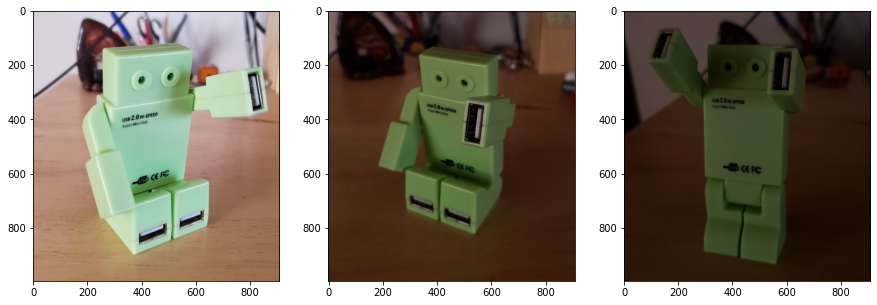

In [4]:
#visualizamos las imagenes originales
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)
ax.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
ax3.imshow(cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB))


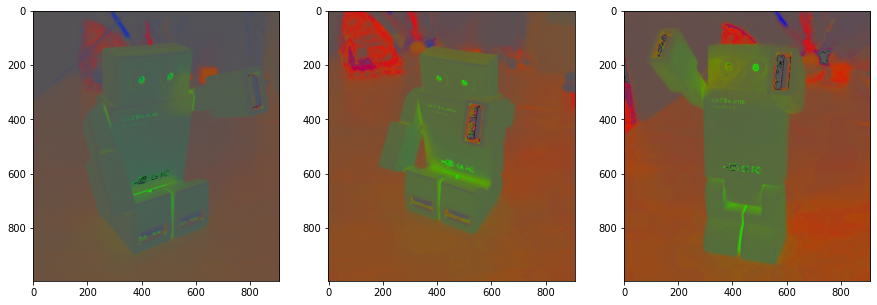

In [5]:
#visualizamos las imagenes procesadas
f = plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(cv2.cvtColor(np.uint8(img_1_crom*255), cv2.COLOR_BGR2RGB))
plt.subplot(132)
plt.imshow(cv2.cvtColor(np.uint8(img_2_crom*255), cv2.COLOR_BGR2RGB))
plt.subplot(133)
plt.imshow(cv2.cvtColor(np.uint8(img_3_crom*255), cv2.COLOR_BGR2RGB))

Alrgoritmo white patch

In [7]:
def white_patch(img):
    new_img=img.copy()
    B,G,R = cv2.split(new_img)
    maxr=np.amax(R)
    maxb=np.amax(B)
    maxg=np.amax(G)
    sr=float(255)/maxr
    sb=float(255)/maxb
    sg=float(255)/maxg
    rows,cols,dim=new_img.shape
    new_new_img = np.zeros(new_img.shape)
    for i in range(rows):
        for j in range(cols):
            k = new_img[i,j].sum()
            (b,g,r)=new_img[i,j]
            new_img[i,j]=(int(b*sb),int(g*sg),int(r*sr))
    return new_img

In [7]:
test_blue = cv2.imread('test_blue.png')
test_green = cv2.imread('test_green.png')
test_red = cv2.imread('test_red.png')

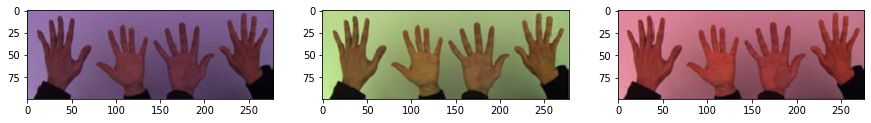

In [8]:
#visualizamos las imagenes originales
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)
ax.imshow(cv2.cvtColor(test_blue, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(test_green, cv2.COLOR_BGR2RGB))
ax3.imshow(cv2.cvtColor(test_red, cv2.COLOR_BGR2RGB))

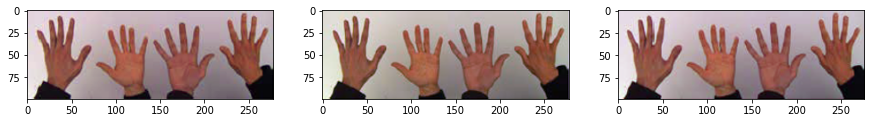

In [9]:
#procesamos las imagenes con la funcion white patch
test_blue_wp=white_patch(test_blue)
test_green_wp=white_patch(test_green)
test_red_wp=white_patch(test_red)

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)
ax.imshow(cv2.cvtColor(test_blue_wp, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(test_green_wp, cv2.COLOR_BGR2RGB))
ax3.imshow(cv2.cvtColor(test_red_wp, cv2.COLOR_BGR2RGB))

In [10]:
wp_blue = cv2.imread('wp_blue.jpg')
wp_green = cv2.imread('wp_green.png')
wp_red = cv2.imread('wp_red.png')

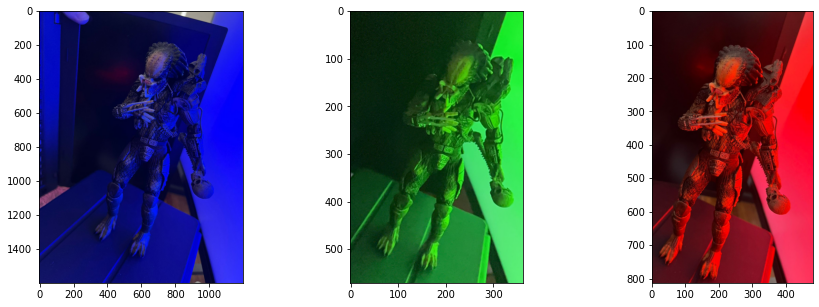

In [11]:
#visualizamos las imagenes originales
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)
ax.imshow(cv2.cvtColor(wp_blue, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(wp_green, cv2.COLOR_BGR2RGB))
ax3.imshow(cv2.cvtColor(wp_red, cv2.COLOR_BGR2RGB))

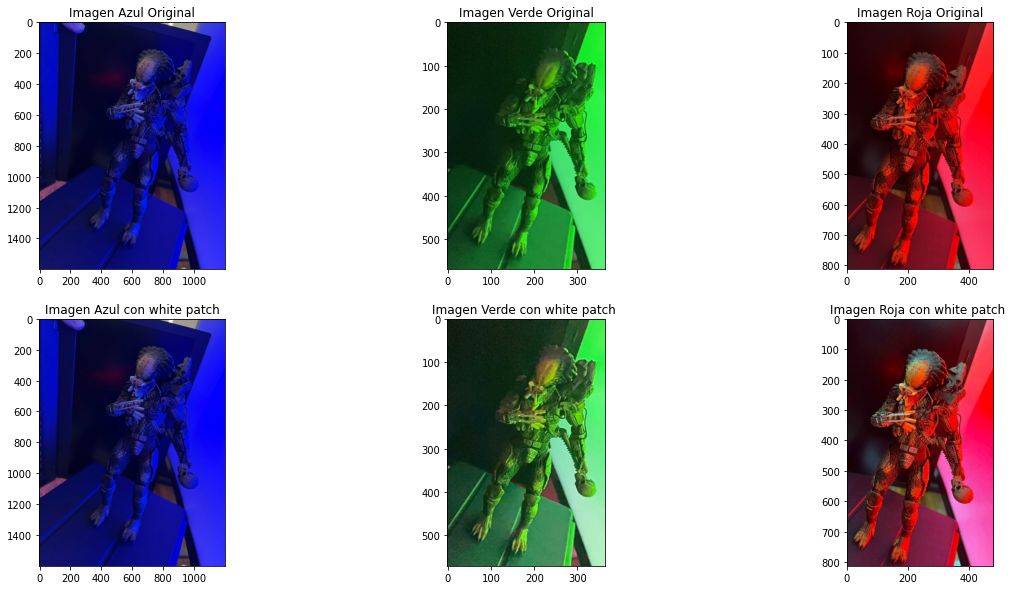

In [13]:
#procesamos las imagenes con la funcion white patch
test_blue_wp=white_patch(wp_blue)
test_green_wp=white_patch(wp_green)
test_red_wp=white_patch(wp_red)

f = plt.figure(figsize=(20,10))
ax = f.add_subplot(231)
ax2 = f.add_subplot(232)
ax3 = f.add_subplot(233)
ax4 = f.add_subplot(234)
ax5 = f.add_subplot(235)
ax6 = f.add_subplot(236)
ax.set_title("Imagen Azul Original")
ax2.set_title("Imagen Verde Original")
ax3.set_title("Imagen Roja Original")
ax4.set_title("Imagen Azul con white patch")
ax5.set_title("Imagen Verde con white patch ")
ax6.set_title("Imagen Roja con white patch ")
ax.imshow(cv2.cvtColor(wp_blue, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(wp_green, cv2.COLOR_BGR2RGB))
ax3.imshow(cv2.cvtColor(wp_red, cv2.COLOR_BGR2RGB))
ax4.imshow(cv2.cvtColor(test_blue_wp, cv2.COLOR_BGR2RGB))
ax5.imshow(cv2.cvtColor(test_green_wp, cv2.COLOR_BGR2RGB))
ax6.imshow(cv2.cvtColor(test_red_wp, cv2.COLOR_BGR2RGB))

Se puede ver una leve recuperacion de los colores originales. 
Ahora probamos con imagenes que estan mas saturadas.

In [5]:
green_2 = cv2.imread('wp_green2.jpg')
red_2 = cv2.imread('wp_red2.jpg')

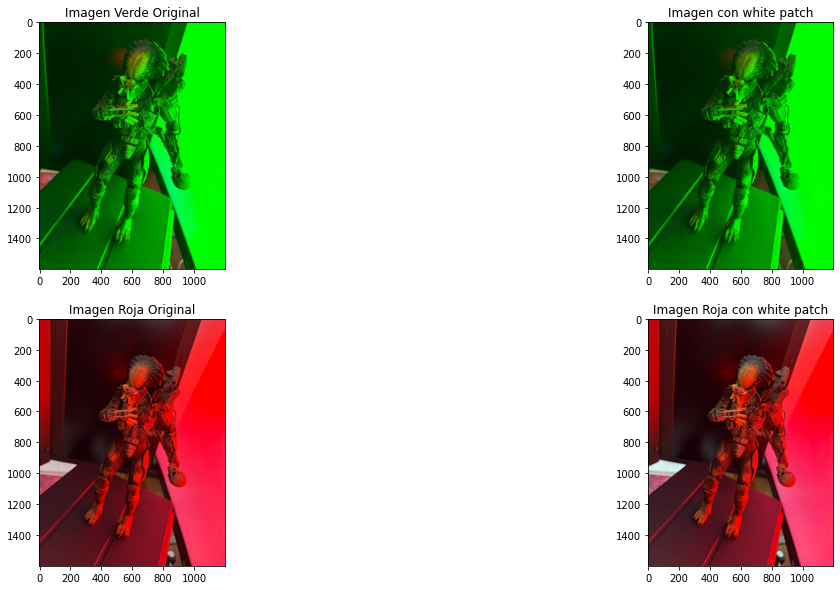

In [8]:
#procesamos las imagenes con la funcion white patch
green_wp_2=white_patch(green_2)
red_wp_2=white_patch(red_2)

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)
ax1.set_title("Imagen Verde Original")
ax2.set_title("Imagen con white patch")
ax3.set_title("Imagen Roja Original")
ax4.set_title("Imagen Roja con white patch")
ax1.imshow(cv2.cvtColor(green_wp_2, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(green_2, cv2.COLOR_BGR2RGB))
ax3.imshow(cv2.cvtColor(red_2, cv2.COLOR_BGR2RGB))
ax4.imshow(cv2.cvtColor(red_wp_2, cv2.COLOR_BGR2RGB))

Podemos observar que casi no hay cambios en la figura del muñeco utilizando el algoritmo white patch y esto se debe a que tenemos una saturacion en los canales lo que provoca una cancelacion del factor multiplicador. Lo correcto es trabajar con percentiles cuando se detecta algun canal saturado. 

In [18]:
def white_patch_percentile(img):
    new_img=img.copy()
    B,G,R = cv2.split(new_img)
    maxr=np.percentile(R, 96)
    maxb=np.percentile(B, 96)
    maxg=np.percentile(G, 96)
    sr=float(255)/maxr
    sb=float(255)/maxb
    sg=float(255)/maxg
    rows,cols,dim=new_img.shape
    new_new_img = np.zeros(new_img.shape)
    for i in range(rows):
        for j in range(cols):
            k = new_img[i,j].sum()
            (b,g,r)=new_img[i,j]
            new_img[i,j]=(int(b*sb),int(g*sg),int(r*sr))
    return new_img

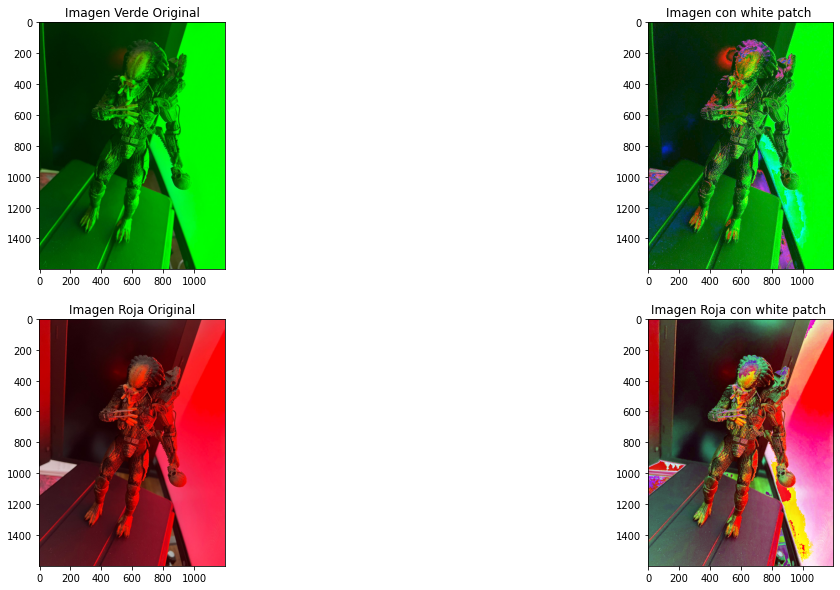

In [19]:
#procesamos las imagenes con la funcion white patch percentile
green_wp_2=white_patch_percentile(green_2)
red_wp_2=white_patch_percentile(red_2)

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)
ax1.set_title("Imagen Verde Original")
ax2.set_title("Imagen con white patch ")
ax3.set_title("Imagen Roja Original")
ax4.set_title("Imagen Roja con white patch ")
ax1.imshow(cv2.cvtColor(green_2, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(green_wp_2, cv2.COLOR_BGR2RGB))
ax3.imshow(cv2.cvtColor(red_2, cv2.COLOR_BGR2RGB))
ax4.imshow(cv2.cvtColor(red_wp_2, cv2.COLOR_BGR2RGB))

Podemos ver que si bien algunas partes del muñeco se recuperaron, cuando el canal esta saturado el algoritmo white patch no da los mejores resultados. 

Parte 2

In [16]:
img1 = cv2.imread("img1_tp.png",cv2.IMREAD_GRAYSCALE)
img2=cv2.imread("img2_tp.png",cv2.IMREAD_GRAYSCALE)

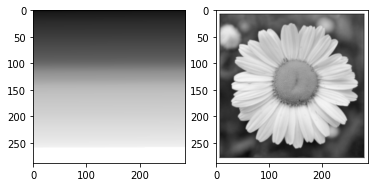

In [17]:
#Visualizamos las imagenes
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [19]:
#calculamos el histograma de ambas
hist=cv2.calcHist([img1],[0],None,[50],[0,256])
hist2=cv2.calcHist([img2],[0],None,[50],[0,256])

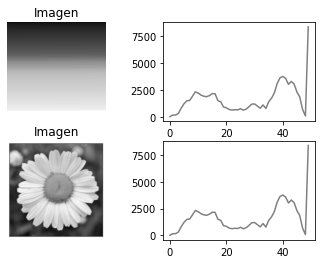

In [20]:
#visualizamos las imagenes con su histograma
fig,ax=plt.subplots(2,2)
ax[0,0].imshow(img1,cmap='gray')
ax[0,0].set_title('Imagen')
ax[0,0].axis('off')
ax[0,1].plot(hist,color='gray')
ax[1,0].imshow(img2,cmap='gray')
ax[1,0].set_title('Imagen')
ax[1,0].axis('off')
ax[1,1].plot(hist2,color='gray')


Si bien las imagenes son diferentes puede ser que compartan el mismo histograma, ya que es una medida de como se distribuyen los pixeles en un rango de valores. Viendo esto, podemos concluir que en este caso no seria util usar el histograma como feature si se quiere clasificar las imagenes.

Segmentacion 

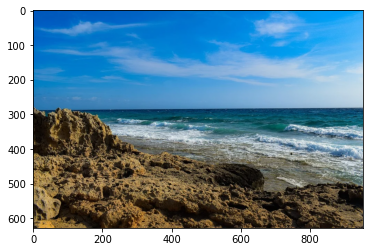

In [18]:
img = cv2.imread('segmentacion.png')
#visualizacion de la imagen
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

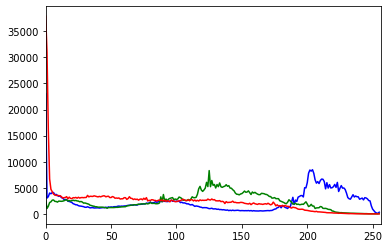

In [23]:
#histograma de los canales RGB
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

Podemos observar que tenemos un par de picos en los colores azul y verde, vamos a probar la segmentacion separando los pixeles segun vemos en el histograma. 

In [24]:
def segmentacion(img,th_min,th_max):
    img_cpy=img.copy()
    B,G,R = cv2.split(img_cpy)
    rows,cols,dim=img_cpy.shape
    for i in range(rows):
        for j in range(cols):
                (b,g,r)=img_cpy[i,j]
                if b>th_max or b<th_min:
                    img_cpy[i,j]=(int(b*0),int(g*0),int(r*0))
    return img_cpy

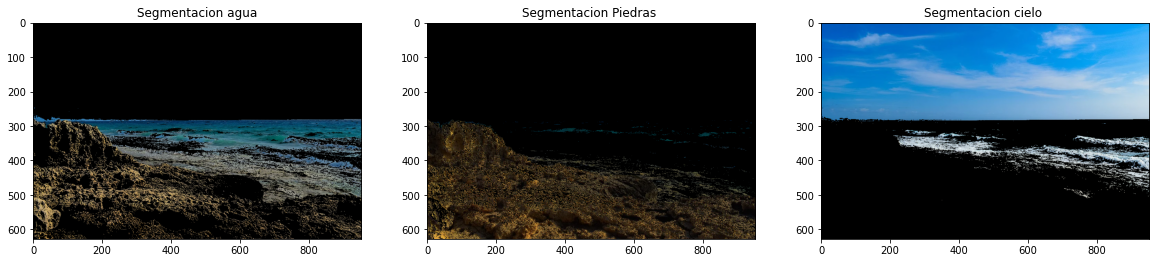

In [26]:
img_1=segmentacion(img,75,175)
img_2=segmentacion(img,0,75)
img_3=segmentacion(img,175,255)
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)
ax1.set_title("Segmentacion agua")
ax2.set_title("Segmentacion Piedras ")
ax3.set_title("Segmentacion cielo ")
ax1.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
ax3.imshow(cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB))

Vemos que lo mejor que se segmenta es el cielo, lo cual tiene sentido ya que vemos en el histograma que es el pico mas marcado y que mejor se puede separar.